In [124]:
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (20,10)


In [121]:
def analyze_stock(ticker, start, end, seasonal=True, split_ratio=0.8):
    # Load data
    data = yf.download(ticker, start=start, end=end)

    # Preprocess data
    data = data[['Close']]
    data = data.dropna()
    data = data['Close'].resample('M', label='left').mean()
    
    if seasonal:
        # Seasonality
        decompose_data = seasonal_decompose(data, model="additative")
        decompose_data.plot()
        plt.show()
        # Split data into training and testing sets
        train_size = int(len(data) * split_ratio)
        train_data = data[:train_size]
        test_data = data[train_size:]
        test_size = len(test_data)


        # Fit and evaluate models for each combination of parameter values
        mse_results = []
        for p in range(0,3):
            for d in range(0,3):
                for q in range(0,3):
                    try:
                        temp_seasonal_order = (p,d,q,12)

                        temp_model_fit = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=temp_seasonal_order).fit()
                        temp_predictions = temp_model_fit.predict(start=train_size, end=train_size+test_size-1, dynamic=True)
                        
                        temp_mse = mean_squared_error(test_data, temp_predictions)
                        mse_results.append((temp_seasonal_order, temp_mse))
                        
                    except:
                        continue


        # Extract best seasonal_order values based on the lowest MSE
        seasonal_order = min(mse_results, key=lambda x: x[1])[0]

        # Fit SARIMAX model
        model_fit = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=seasonal_order).fit()

        # Make predictions
        predictions = model_fit.predict(start=train_size, end=train_size + test_size - 1, dynamic=True)

        # Plot actual and predicted values
        plt.plot(data.index, data, label='Actual')
        plt.plot(test_data.index, predictions, label='Predicted')
        plt.legend()
        plt.show()

        # Calculate MSE
        mse = mean_squared_error(test_data, predictions)
        print('Seasonal_order: {} \nMSE: {}'.format(seasonal_order, mse))
                

[*********************100%***********************]  1 of 1 completed


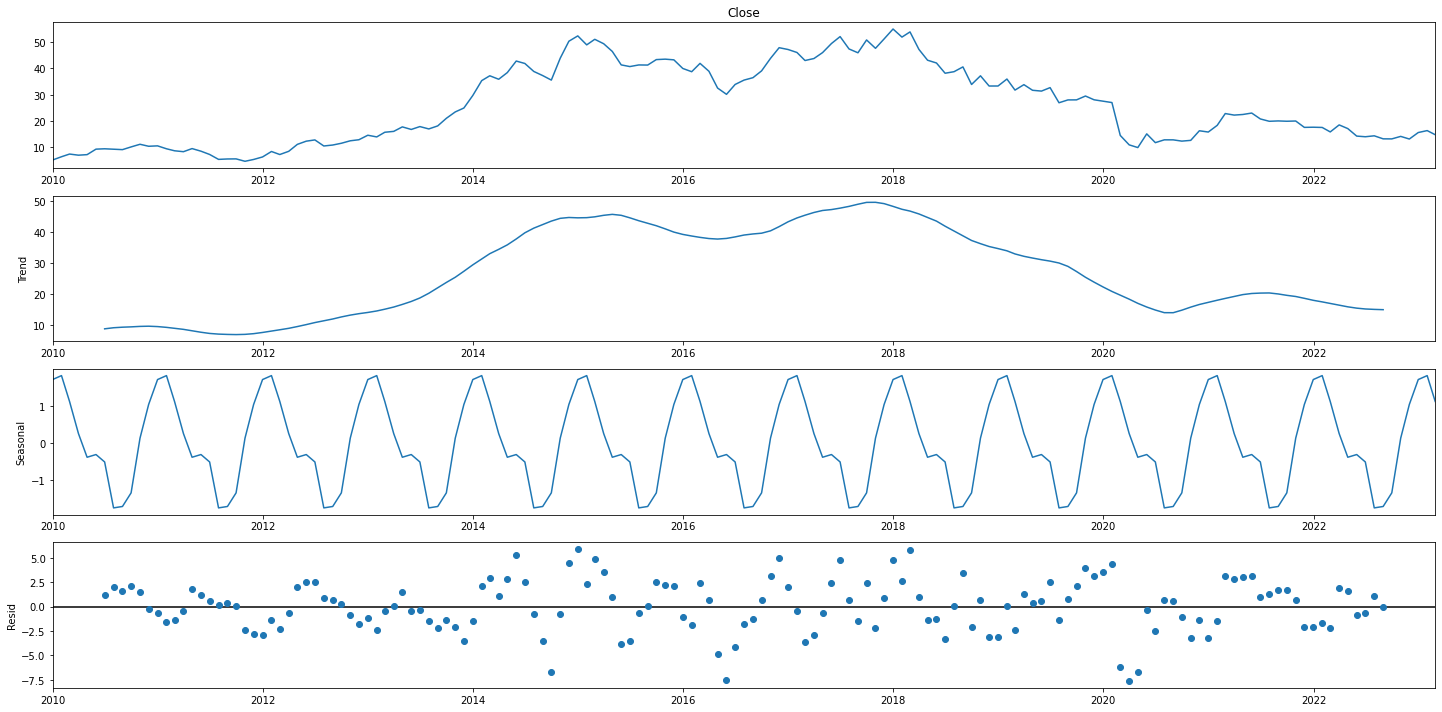

c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


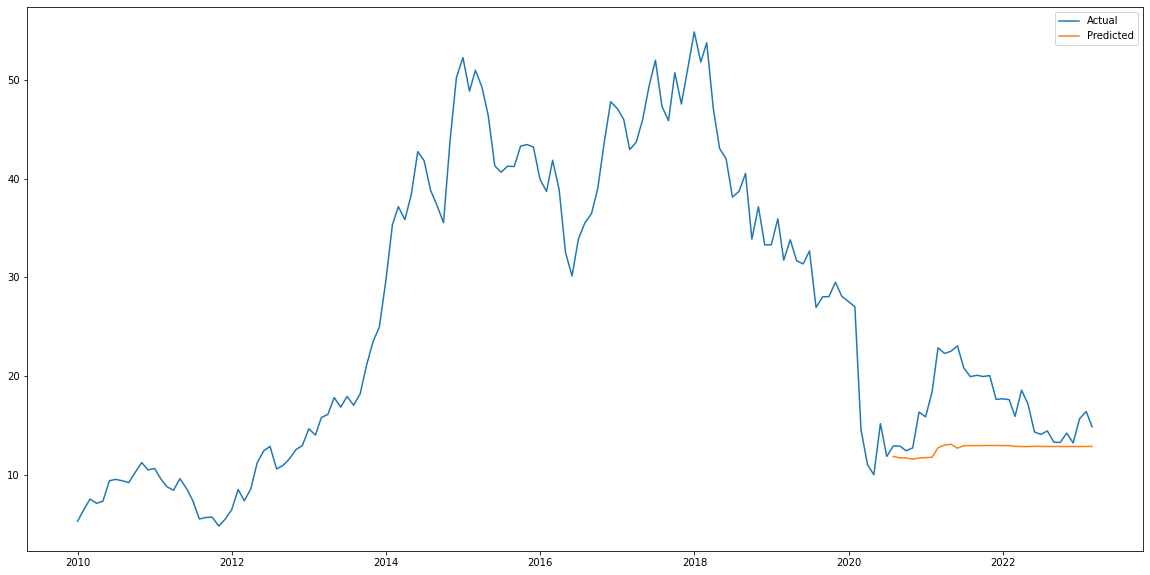

Seasonal_order: (1, 0, 0, 12) 
MSE: 27.93462386709824


In [122]:
analyze_stock('AAL', '2010-01-01', '2023-04-03')

[*********************100%***********************]  1 of 1 completed


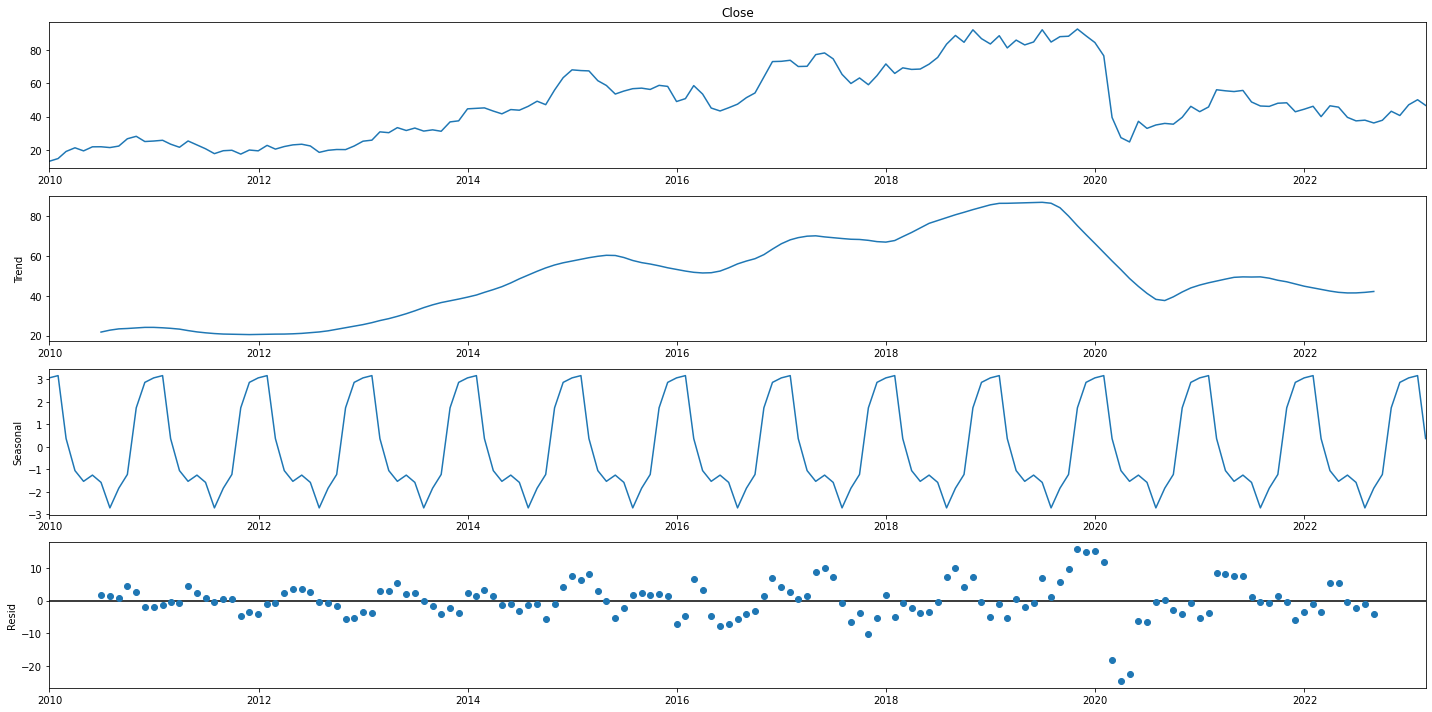

c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood opti

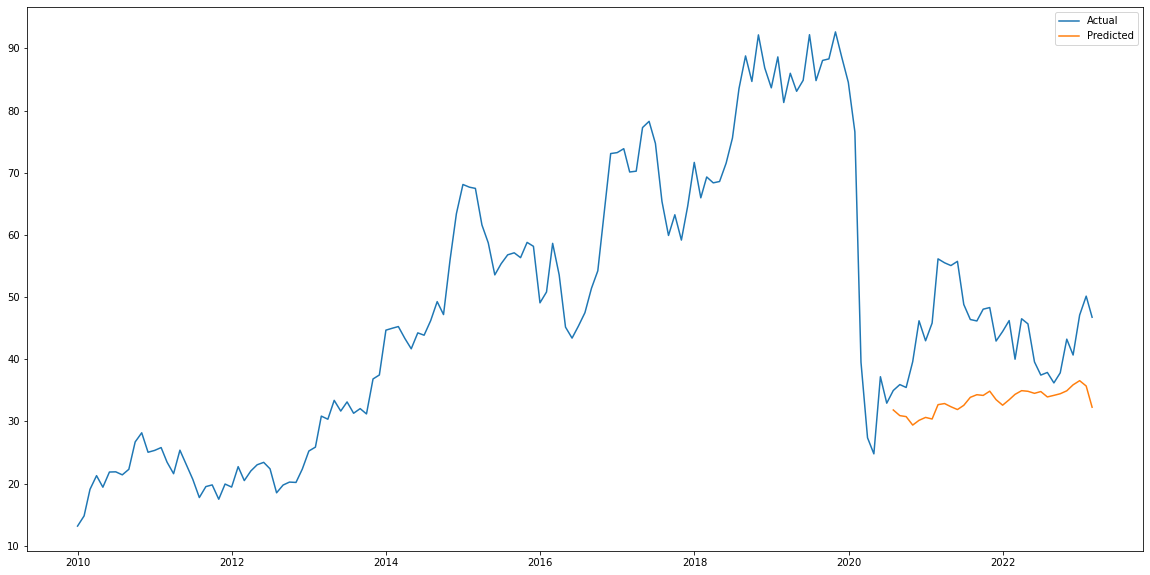

Seasonal_order: (2, 0, 2, 12) 
MSE: 163.9540149272391


In [123]:
analyze_stock('UAL', '2010-01-01', '2023-04-03')